## Behavioral Cloning

Cloning the github created to store the training files

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
!git clone https://github.com/AyushGarla/Track1

fatal: destination path 'Track1' already exists and is not an empty directory.


In [ ]:
!ls Track1/T_Data  #files present inside

driving_log.csv  IMG


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical  # Corrected import
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout #convolution and pooling opertations (we use LeNet which has 2 conv and 2 pooling layers)
import pandas as pd
import random
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

Reading the data

In [ ]:
datadir = 'Track1/T_Data'
columns = ['center','left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'),names = columns)
pd.set_option('display.max_colwidth', None)
data.head(50)

,center,left,right,steering,throttle,reverse,speed
0,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\center_2025_01_24_02_55_29_318.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\left_2025_01_24_02_55_29_318.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\right_2025_01_24_02_55_29_318.jpg,0.000000,0.000000,0.0,0.000078
1,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\center_2025_01_24_02_55_29_419.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\left_2025_01_24_02_55_29_419.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\right_2025_01_24_02_55_29_419.jpg,0.000000,0.000000,0.0,0.000080
2,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\center_2025_01_24_02_55_29_521.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\left_2025_01_24_02_55_29_521.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\right_2025_01_24_02_55_29_521.jpg,0.000000,0.000000,0.0,0.000078
3,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\center_2025_01_24_02_55_29_625.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\left_2025_01_24_02_55_29_625.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\right_2025_01_24_02_55_29_625.jpg,0.000000,0.000000,0.0,0.000078
4,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\center_2025_01_24_02_55_29_728.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\left_2025_01_24_02_55_29_728.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\right_2025_01_24_02_55_29_728.jpg,0.000000,0.000000,0.0,0.000078
5,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\center_2025_01_24_02_55_29_830.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\left_2025_01_24_02_55_29_830.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\right_2025_01_24_02_55_29_830.jpg,0.000000,0.000000,0.0,0.000078
6,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\center_2025_01_24_02_55_29_932.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\left_2025_01_24_02_55_29_932.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\right_2025_01_24_02_55_29_932.jpg,0.000000,0.000000,0.0,0.000078
7,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\center_2025_01_24_02_55_30_032.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\left_2025_01_24_02_55_30_032.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\right_2025_01_24_02_55_30_032.jpg,0.000000,0.000000,0.0,0.000079
8,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\center_2025_01_24_02_55_30_133.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\left_2025_01_24_02_55_30_133.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\right_2025_01_24_02_55_30_133.jpg,0.000000,0.000000,0.0,0.000080
9,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\center_2025_01_24_02_55_30_234.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\left_2025_01_24_02_55_30_234.jpg,F:\MS\Udemy courses\Self Driving Cars\Srction 13 Behavioral cloning\Training Data\IMG\right_2025_01_24_02_55_30_234.jpg,0.000000,0.000000,0.0,0.000078


To get the tail end of the image path


In [ ]:
import ntpath

def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2025_01_24_02_55_29_318.jpg,left_2025_01_24_02_55_29_318.jpg,right_2025_01_24_02_55_29_318.jpg,0.0,0.0,0.0,0.000078
1,center_2025_01_24_02_55_29_419.jpg,left_2025_01_24_02_55_29_419.jpg,right_2025_01_24_02_55_29_419.jpg,0.0,0.0,0.0,0.000080
2,center_2025_01_24_02_55_29_521.jpg,left_2025_01_24_02_55_29_521.jpg,right_2025_01_24_02_55_29_521.jpg,0.0,0.0,0.0,0.000078
3,center_2025_01_24_02_55_29_625.jpg,left_2025_01_24_02_55_29_625.jpg,right_2025_01_24_02_55_29_625.jpg,0.0,0.0,0.0,0.000078
4,center_2025_01_24_02_55_29_728.jpg,left_2025_01_24_02_55_29_728.jpg,right_2025_01_24_02_55_29_728.jpg,0.0,0.0,0.0,0.000078


Plotting the histogram of stering angle for each image (center, left, right) to see which angle is the most common

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


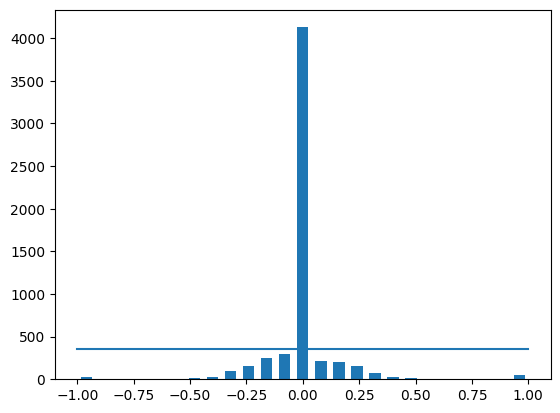

In [ ]:
num_bins = 25   #data is divided into 25 equally distributed values b/w -1 and 1 (sterring values)
samples_per_bin = 350   #threshold value
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
print(bins)   #out values are distributed b/w -1 and 1

Explaination:
1.  A bin is a range of values that groups the data, helping us analyze how data is distributed across the range.
2. center = (bins[:-1] + bins[1:]) * 0.5
This calculates the center of each bin.
bins[:-1]: All bin edges except the last one.
bins[1:]: All bin edges except the first one.
bins[:-1] + bins[1:]: The sum of consecutive bin edges, giving the center point for each bin.
 * 0.5: Dividing by 2 to calculate the midpoint.

0 sterring angle is more because we drove the car in the middle of the lane

This could create a problem for the NN as it might bias more of 0 steering angle, it becomes confused when sharp turns are encountered

So prevent this we will reject all the samples above a certain threshold, ensuring our data is more threshold

### Balacing Data

Making the data uniform

total data: 5762
removed: 3777
remaining: 1985


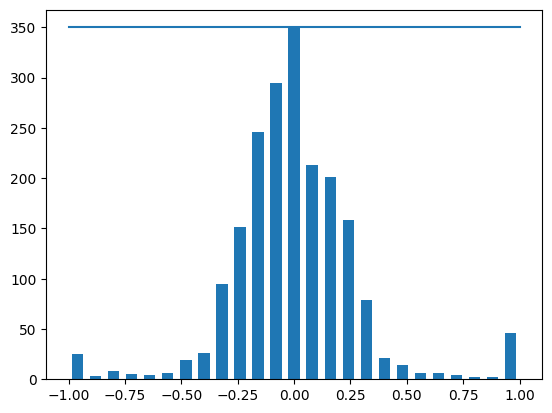

In [ ]:
print('total data:', len(data))
remove_list = []
#looping through all the bins

for j in range(num_bins):
  list_ = []
  #looping through all the steering angles ontained in that bin
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)  #append each index falling in the same category
  #we have to shuffel because each bin has many steering angles, we cannot just cut the last 300 elements as we require all the steering angles from the begining to the end, so we shuffel and cut the last 350
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:] #samples_per_bin is 350 till the end
  remove_list.extend(list_) #the content disposed

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

### Training and Validation split

In [ ]:
print(data.iloc[1]) #just for simulation
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)): #looping through the lenght of the updated data
    indexed_data = data.iloc[i] #iloc = allows us to perform selection based on the index
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip())) #we work with only centered images, so we append the main path, .sprip will remove spaces.
    steering.append(float(indexed_data[3])) #3 as the steering angle is at index 3
  #converting the lists to arrays
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data) #datadir = path, IMG = images


center      center_2025_01_24_02_55_30_032.jpg
left          left_2025_01_24_02_55_30_032.jpg
right        right_2025_01_24_02_55_30_032.jpg
steering                                   0.0
throttle                                   0.0
reverse                                    0.0
speed                                 0.000079
Name: 7, dtype: object


<ipython-input-62-2c0156ccdb25>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
<ipython-input-62-2c0156ccdb25>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3])) #3 as the steering angle is at index 3


splitting

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 1588
Valid Samples: 397


Ensuring both test and train get uniform steering angles (both left and right angles)

Text(0.5, 1.0, 'Validation set')

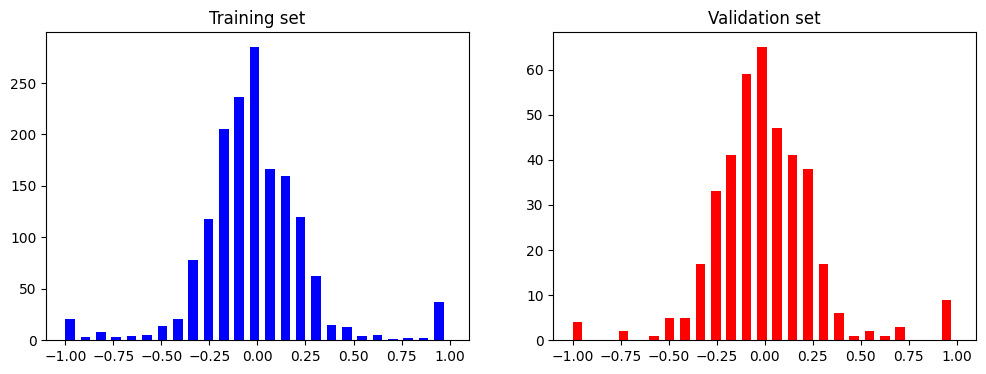

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')


### Preprocessing Images

In [ ]:
def image_preprocess(img):
  #reading the image path and storing the actual image
  img = mpimg = cv2.imread(img)
  #we have to crop the image as we dont require the scenary and the hood of the car
  img = img[60:135, :,:]
  #NVIDIA's YUV coloe space
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  #Blurring
  img = cv2.GaussianBlur(img, (3,3), 0)
  #resizing - for faster computations
  img = cv2.resize(img, (200,66))
  #normalizing
  img = img/255
  return img

Visualizing the original image with preprocessed images

Text(0.5, 1.0, 'Preprocessed Image')

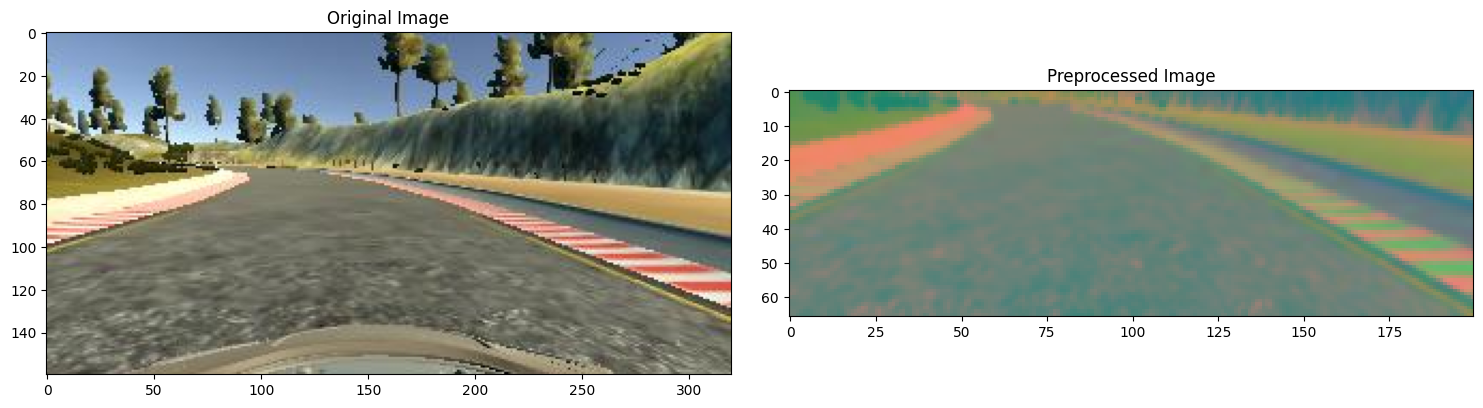

In [ ]:
image = image_paths[30]
original_image = mpimg.imread(image)
preprocessed_image = image_preprocess(image)
fig, axes = plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(preprocessed_image)
axes[1].set_title('Preprocessed Image')

Here we use the NVIDIA color space model for preprocessing using the YUV color space

Y - Luminosity (brightness)
U and V - chromiance that add color to the image

Preprocessing the entire data set

In [ ]:
X_train = np.array(list(map(image_preprocess, X_train))) #map iterated and gives new element

X_valid = np.array(list(map(image_preprocess, X_valid)))

(1588, 66, 200, 3)


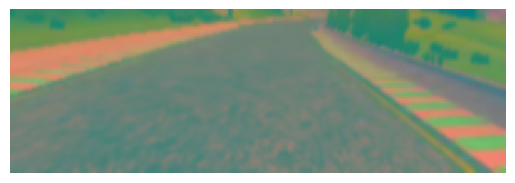

In [ ]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

We use NVIDIA model for behavioral cloning [SS1]

### Designing the model NVIDIA model

In [ ]:
def nvidia_model():
  model = Sequential()
  #1 st layer, consists of 1588 images of dimension 66x200x3 (see the above cell)
  #---------------------------------
  #2nd layer, normalization, we have already done that
  #---------------------------------
  #3rd layer, Conv layer
  model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation='relu')) #subsample = stride
  #---------------------------------
  #4th layer, 2nd Conv layer
  model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='elu'))
  #5th layer, 2nd Conv layer
  model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='elu'))
  #6th layer, 2nd Conv layer, no subsampling as images have reduced dimensions
  model.add(Conv2D(64, (3, 3), activation='elu'))
  #7th layer, 2nd Conv layer
  model.add(Conv2D(64, (3, 3), activation='elu'))
  model.add(Dropout(0.5))
  #---------------------------------------
  # flatten layer
  model.add(Flatten())
  #8th layer, fully connected layer
  model.add(Dense(100, activation='elu'))
  model.add(Dropout(0.5))

  #9th layer, fully connected layer
  model.add(Dense(50, activation='elu'))
  model.add(Dropout(0.5))

  #10th layer, fully connected layer
  model.add(Dense(10, activation='elu'))
  model.add(Dropout(0.5))

  #11th layer, output
  model.add(Dense(1))

  #compiling the model
  model.compile(loss='mse', optimizer=Adam(learning_rate=1e-3))
  return model

In [ ]:
model = nvidia_model()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 31, 98, 24)          │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 47, 36)          │          21,636 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 5, 22, 48)           │          43,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 3, 20, 64)           │          27,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 1, 18, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 18, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │         115,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,219 (985.23 KB)

 Trainable params: 252,219 (985.23 KB)

 Non-trainable params: 0 (0.00 B)

None


### Model Training

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size =100, verbose =1, shuffle=1)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 298ms/step - loss: 1.0389 - val_loss: 0.0943
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1058 - val_loss: 0.0745
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0919 - val_loss: 0.0743
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0791 - val_loss: 0.0740
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0772 - val_loss: 0.0739
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0763 - val_loss: 0.0743
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0861 - val_loss: 0.0728
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0759 - val_loss: 0.0721
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0880 - val_loss: 0.0715
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0763 - val_loss: 0.0696
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0761 - val_loss: 0.0684
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0

Text(0.5, 0, 'Epoch')

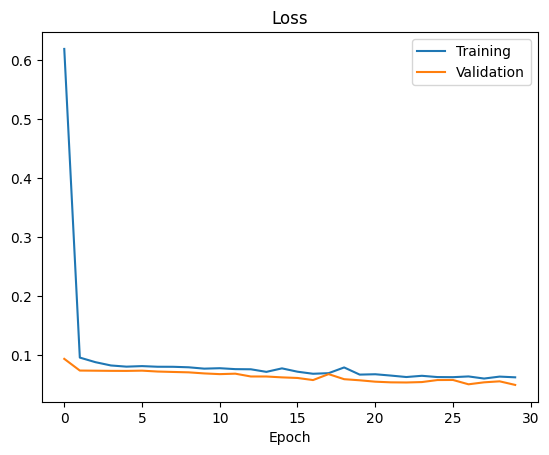

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epoch')

The model is not good at all, so the issue is the activation function, use of relu can sometimes cause dead relu (when a node in the NN dies) this feeds the value 0 to the nodes that follow it.

We know that iof value is -ve relu makes it to 0, if a node gets i/p = -ve , it will return a value of 0, since the gradient of the node = 0 weight will never be changes (during back propagation)

So we use 'elu' activation function now.
1. elu returns a negative number unlike relu.
2. So, it has the chance to recover and fix the weight parameters

### Saving the model

In [ ]:
model.save('model_new.h5', include_optimizer=False)

## Downloading the model

In [ ]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Next we need a code to communicate to the self driving car, wedo this in atom software